In [96]:
import pandas as pd
import numpy as np

In [181]:
transaction_data= pd.read_excel("QVI_transaction_data.xlsx",engine='openpyxl')

In [182]:
customer_data = pd.read_csv("QVI_purchase_behaviour.csv")

In [183]:
transaction_data.head()

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8

In [184]:
customer_data.head()

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream

In [185]:
print(transaction_data.dtypes)
print("..............................")
print(customer_data.dtypes)

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object
..............................
LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object


In [186]:
transaction_data['DATE'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 264836 entries, 0 to 264835
Series name: DATE
Non-Null Count   Dtype
--------------   -----
264836 non-null  int64
dtypes: int64(1)
memory usage: 2.0 MB


In [187]:
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

def convert_to_datetime(num):
    dt = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + num - 2)
    return dt

In [189]:
%%time
transaction_data['DATE'] = transaction_data['DATE'].apply(convert_to_datetime)
transaction_data.head()

CPU times: total: 266 ms
Wall time: 343 ms


DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8

In [190]:
print(transaction_data.dtypes)

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object


In [191]:
transaction_data['PROD_NAME'].describe(include='object')

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [106]:
transaction_data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [107]:
import re
product_words = transaction_data['PROD_NAME'].apply(lambda x: re.sub('[^A-Za-z]', ' ', x))

In [108]:
product_words

0           Natural Chip        Compny SeaSalt   g
1                         CCs Nacho Cheese       g
2           Smiths Crinkle Cut  Chips Chicken    g
3           Smiths Chip Thinly  S Cream Onion    g
4         Kettle Tortilla ChpsHny Jlpno Chili    g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream    g
264832               Tostitos Splash Of  Lime    g
264833                    Doritos Mexicana       g
264834     Doritos Corn Chip Mexican Jalapeno    g
264835               Tostitos Splash Of  Lime    g
Name: PROD_NAME, Length: 264836, dtype: object

In [109]:
product_words.value_counts()

PROD_NAME
Kettle Mozzarella   Basil   Pesto    g      3304
Kettle Tortilla ChpsHny Jlpno Chili    g    3296
Cobs Popd Swt Chlli  Sr Cream Chips    g    3269
Tyrrells Crisps     Ched   Chives    g      3268
Cobs Popd Sea Salt  Chips    g              3265
                                            ... 
RRD Pc Sea Salt        g                    1431
Woolworths Medium   Salsa    g              1430
NCC Sour Cream      Garden Chives    g      1419
French Fries Potato Chips    g              1418
WW Crinkle Cut      Original    g           1410
Name: count, Length: 114, dtype: int64

In [110]:
transaction_data['PROD_NAME'].value_counts()

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

In [111]:
transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.contains('salsa', case=False)]

In [112]:
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [113]:
transaction_data.describe()

DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246742  246742.000000    2.467420e+05   
mean   2018-12-30 01:19:01.211467520     135.051098    1.355310e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001500e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030840e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.787096    8.071528e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.467420e+05  246742.000000  246742.000000  246742.000000  
mean   1.351311e+05      56.351789       1.908062       7.321322  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.756925e+04      26.000000       2.000000       5.800000  
50%    1.351830e+05      53.000000       2.000000       7.400000  
75%    2.026538e+05      87.000000       2.000000       8.800000  
max    2.415841e+06     114.000000     200.000000     650.000000  
std    7.814772e+04      33.695428       0.659831       3.077828

In [114]:
outlier = transaction_data[transaction_data['PROD_QTY'] == 200]

In [115]:
outlier

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0

In [116]:
# Before outlier
transaction_data.shape

(246742, 8)

In [117]:
transaction_data = transaction_data.drop(outlier.index)
# #After outlier
transaction_data.shape

(246740, 8)

In [118]:
transaction_data.sort_values(by='DATE')

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
9161   2018-07-01         88           88140   86914        25   
155442 2018-07-01         60           60276   57330         3   
181349 2018-07-01        199          199014  197623       104   
229948 2018-07-01         35           35052   31630        11   
104647 2018-07-01         72           72104   71038        20   
...           ...        ...             ...     ...       ...   
10254  2019-06-30        112          112141  114611        98   
113220 2019-06-30        207          207155  205513        99   
229182 2019-06-30         10           10140    9882        12   
229015 2019-06-30          6            6258    6047        29   
262768 2019-06-30        183          183196  185975        22   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
9161              Pringles SourCream  Onion 134g         2        7.4  
155442  Kettle Sensations   Camembert & Fig 150g         2        9.2  
181349  Infuzions Thai SweetChili PotatoMix 110g         2        7.6  
229948                  RRD Pc Sea Salt     165g         1        3.0  
104647          Doritos Cheese      Supreme 330g         2       11.4  
...                                          ...       ...        ...  
10254     NCC Sour Cream &    Garden Chives 175g         2        6.0  
113220          Pringles Sthrn FriedChicken 134g         2        7.4  
229182   Natural Chip Co     Tmato Hrb&Spce 175g         2        6.0  
229015            French Fries Potato Chips 175g         1        3.0  
262768    Thins Chips         Originl saltd 175g         2        6.6  

[246740 rows x 8 columns]

In [119]:
new =pd.pivot_table(transaction_data, values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')
new.head()

TOT_SALES
DATE                 
2018-07-01     4920.1
2018-07-02     4877.0
2018-07-03     4954.7
2018-07-04     4968.1
2018-07-05     4682.0

In [120]:
len(new)

364

In [121]:
new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 364 entries, 2018-07-01 to 2019-06-30
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TOT_SALES  364 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [122]:
pd.date_range(start = '2018-07-01', end = '2019-06-30').difference(transaction_data['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [123]:

# create a sequence of dates from 1 Jul 2018 to 30 Jun 2019
dates = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
dates['TOT_SALES'] = 0

In [124]:
len(dates)

365

In [125]:
# create a new dataframe with the dates
date_count = new + dates
date_count.index.name = 'DATE'
date_count.isnull().sum()

TOT_SALES    1
dtype: int64

In [126]:
date_count.fillna(0, inplace = True)
date_count.head(10)

TOT_SALES
DATE                 
2018-07-01     4920.1
2018-07-02     4877.0
2018-07-03     4954.7
2018-07-04     4968.1
2018-07-05     4682.0
2018-07-06     5249.4
2018-07-07     4998.7
2018-07-08     4753.0
2018-07-09     5140.6
2018-07-10     4700.0

In [127]:
date_count.isnull().sum()

TOT_SALES    0
dtype: int64

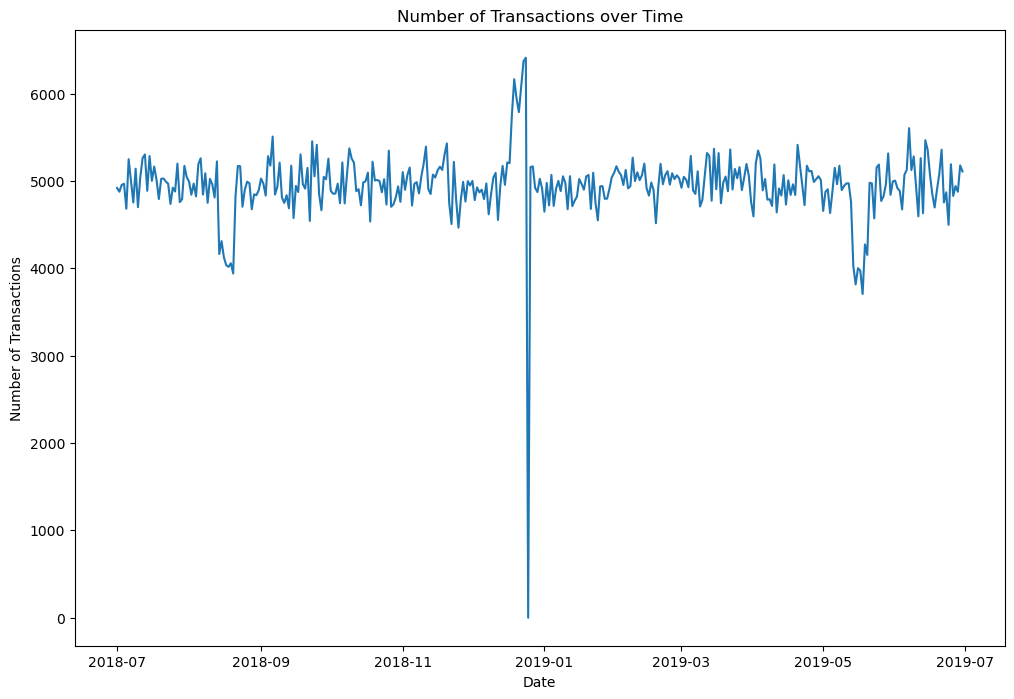

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8)) 
sns.lineplot(x=date_count.index, y='TOT_SALES', data=date_count) 
plt.xlabel('Date') 
plt.ylabel('Number of Transactions') 
plt.title('Number of Transactions over Time') 
plt.show()

In [129]:
transaction_data

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3        6.3  
2         Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3         Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
...                                          ...       ...        ...  
264831   Kettle Sweet Chilli And Sour Cream 175g         2       10.8  
264832             Tostitos Splash Of  Lime 175g         1        4.4  
264833                  Doritos Mexicana    170g         2        8.8  
264834   Doritos Corn Chip Mexican Jalapeno 150g         2        7.8  
264835             Tostitos Splash Of  Lime 175g         2        8.8  

[246740 rows x 8 columns]

In [130]:
dec_month = date_count[date_count.index.month==12]
dec_month

TOT_SALES
DATE                 
2018-12-01     5000.9
2018-12-02     4781.1
2018-12-03     4927.0
2018-12-04     4869.4
2018-12-05     4900.5
2018-12-06     4792.9
2018-12-07     4971.7
2018-12-08     4618.4
2018-12-09     4844.8
2018-12-10     5037.7
2018-12-11     5092.5
2018-12-12     4553.7
2018-12-13     4946.4
2018-12-14     5173.0
2018-12-15     4955.8
2018-12-16     5211.7
2018-12-17     5204.2
2018-12-18     5762.2
2018-12-19     6164.7
2018-12-20     5942.8
2018-12-21     5788.3
2018-12-22     6079.8
2018-12-23     6372.1
2018-12-24     6410.9
2018-12-25        0.0
2018-12-26     5159.3
2018-12-27     5166.9
2018-12-28     4920.0
2018-12-29     4873.2
2018-12-30     5024.6
2018-12-31     4915.1

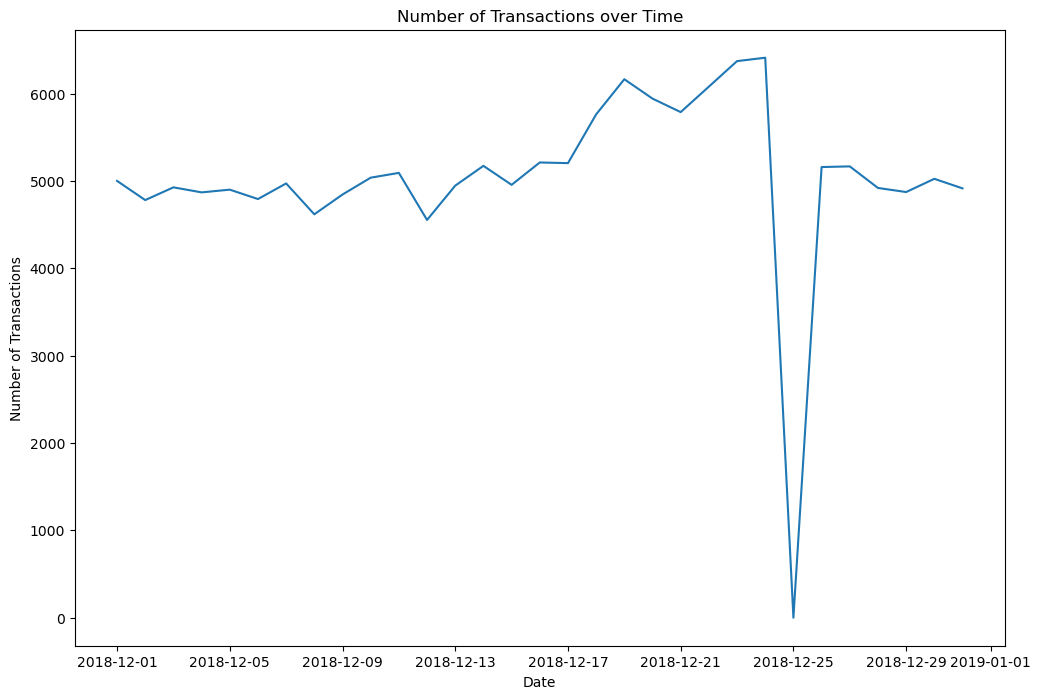

In [131]:
plt.figure(figsize=(12, 8)) 
sns.lineplot(x=dec_month.index, y='TOT_SALES', data=dec_month) 
plt.xlabel('Date') 
plt.ylabel('Number of Transactions') 
plt.title('Number of Transactions over Time') 
plt.show()

In [132]:
transaction_data.head()

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8

In [133]:
transaction_data['PACK_SIZE_gm']=transaction_data['PROD_NAME'].str.extract("(\d+)")
transaction_data['PACK_SIZE_gm'] = pd.to_numeric(transaction_data['PACK_SIZE_gm'])
transaction_data

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3        6.3   
2         Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3         Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   
...                                          ...       ...        ...   
264831   Kettle Sweet Chilli And Sour Cream 175g         2       10.8   
264832             Tostitos Splash Of  Lime 175g         1        4.4   
264833                  Doritos Mexicana    170g         2        8.8   
264834   Doritos Corn Chip Mexican Jalapeno 150g         2        7.8   
264835             Tostitos Splash Of  Lime 175g         2        8.8   

        PACK_SIZE_gm  
0                175  
1                175  
2                170  
3                175  
4                150  
...              ...  
264831           175  
264832           175  
264833           170  
264834           150  
264835           175  

[246740 rows x 9 columns]

In [134]:
transaction_data.describe()

DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246740  246740.000000    2.467400e+05   
mean   2018-12-30 01:18:58.448569344     135.050361    1.355303e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001500e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030832e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.786971    8.071520e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  \
count  2.467400e+05  246740.000000  246740.000000  246740.000000   
mean   1.351304e+05      56.352213       1.906456       7.316113   
min    1.000000e+00       1.000000       1.000000       1.700000   
25%    6.756875e+04      26.000000       2.000000       5.800000   
50%    1.351815e+05      53.000000       2.000000       7.400000   
75%    2.026522e+05      87.000000       2.000000       8.800000   
max    2.415841e+06     114.000000       5.000000      29.500000   
std    7.814760e+04      33.695235       0.342499       2.474897   

        PACK_SIZE_gm  
count  246740.000000  
mean      175.583521  
min        70.000000  
25%       150.000000  
50%       170.000000  
75%       175.000000  
max       380.000000  
std        59.432118

In [135]:
transaction_data['PACK_SIZE_gm'].value_counts()

PACK_SIZE_gm
175    66390
150    40203
134    25102
110    22387
170    19983
165    15297
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: count, dtype: int64

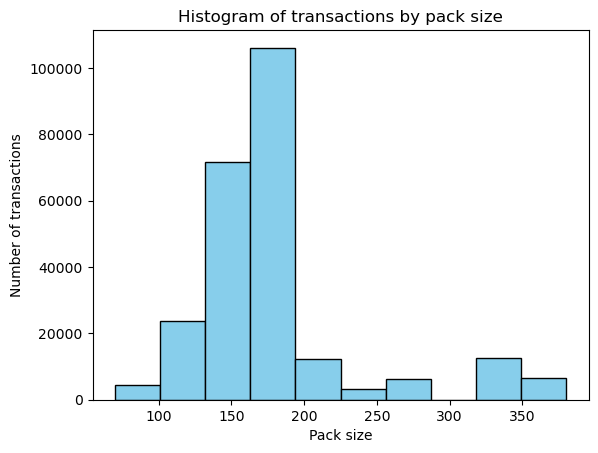

In [136]:
plt.hist(transaction_data['PACK_SIZE_gm'], color='skyblue', edgecolor='black')

plt.xlabel('Pack size')
plt.ylabel('Number of transactions')
plt.title('Histogram of transactions by pack size')

plt.show()

In [137]:
transaction_data['BRAND_NAME'] = transaction_data['PROD_NAME'].str.split().str[0]
transaction_data.head()

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   

   PACK_SIZE_gm BRAND_NAME  
0           175    Natural  
1           175        CCs  
2           170     Smiths  
3           175     Smiths  
4           150     Kettle

In [138]:
brand_mapping = {
    "Red": "RRD",
    "Infzns":"Infuzions",
    "INFUZIONS":"Infuzions",
    "Snbts":"Sunbites",
    "WW": "Woolworths",
    "WOOLWORTHS":"Woolworths",
    "Smith": "Smiths",
    "NCC": "Natural",
    "NATURAL":"Natural",
    "Dorito": "Doritos",
    "Grain": "GrnWves"
}

In [139]:
transaction_data['BRAND_NAME'] = transaction_data['BRAND_NAME'].replace(brand_mapping)

In [140]:
transaction_data['BRAND_NAME'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'GrnWves', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'RRD', 'Pringles', 'Tyrrells', 'Cobs', 'French',
       'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [141]:
transaction_data.head()

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   

   PACK_SIZE_gm BRAND_NAME  
0           175    Natural  
1           175        CCs  
2           170     Smiths  
3           175     Smiths  
4           150     Kettle

In [142]:
transaction_data= transaction_data.sort_values(by="DATE", ascending = True)
transaction_data.head()

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
9161   2018-07-01         88           88140   86914        25   
155442 2018-07-01         60           60276   57330         3   
181349 2018-07-01        199          199014  197623       104   
229948 2018-07-01         35           35052   31630        11   
104647 2018-07-01         72           72104   71038        20   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
9161              Pringles SourCream  Onion 134g         2        7.4   
155442  Kettle Sensations   Camembert & Fig 150g         2        9.2   
181349  Infuzions Thai SweetChili PotatoMix 110g         2        7.6   
229948                  RRD Pc Sea Salt     165g         1        3.0   
104647          Doritos Cheese      Supreme 330g         2       11.4   

        PACK_SIZE_gm BRAND_NAME  
9161             134   Pringles  
155442           150     Kettle  
181349           110  Infuzions  
229948           165        RRD  
104647           330    Doritos

In [143]:
transaction_data.reset_index(drop=True, inplace=True)
transaction_data

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-07-01         88           88140   86914        25   
1      2018-07-01         60           60276   57330         3   
2      2018-07-01        199          199014  197623       104   
3      2018-07-01         35           35052   31630        11   
4      2018-07-01         72           72104   71038        20   
...           ...        ...             ...     ...       ...   
246735 2019-06-30        112          112141  114611        98   
246736 2019-06-30        207          207155  205513        99   
246737 2019-06-30         10           10140    9882        12   
246738 2019-06-30          6            6258    6047        29   
246739 2019-06-30        183          183196  185975        22   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0                 Pringles SourCream  Onion 134g         2        7.4   
1       Kettle Sensations   Camembert & Fig 150g         2        9.2   
2       Infuzions Thai SweetChili PotatoMix 110g         2        7.6   
3                       RRD Pc Sea Salt     165g         1        3.0   
4               Doritos Cheese      Supreme 330g         2       11.4   
...                                          ...       ...        ...   
246735    NCC Sour Cream &    Garden Chives 175g         2        6.0   
246736          Pringles Sthrn FriedChicken 134g         2        7.4   
246737   Natural Chip Co     Tmato Hrb&Spce 175g         2        6.0   
246738            French Fries Potato Chips 175g         1        3.0   
246739    Thins Chips         Originl saltd 175g         2        6.6   

        PACK_SIZE_gm BRAND_NAME  
0                134   Pringles  
1                150     Kettle  
2                110  Infuzions  
3                165        RRD  
4                330    Doritos  
...              ...        ...  
246735           175    Natural  
246736           134   Pringles  
246737           175    Natural  
246738           175     French  
246739           175      Thins  

[246740 rows x 10 columns]

In [144]:
customer_data.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [145]:
customer_data.head()

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream

In [146]:
customer_data.shape

(72637, 3)

In [147]:
customer_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [148]:
customer_data['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [149]:
customer_data['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [150]:
merged_data = pd.merge(transaction_data, customer_data,on='LYLTY_CARD_NBR', how ='left')

In [151]:
merged_data.shape

(246740, 12)

In [152]:
merged_data.head()

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-07-01         88           88140   86914        25   
1 2018-07-01         60           60276   57330         3   
2 2018-07-01        199          199014  197623       104   
3 2018-07-01         35           35052   31630        11   
4 2018-07-01         72           72104   71038        20   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0            Pringles SourCream  Onion 134g         2        7.4   
1  Kettle Sensations   Camembert & Fig 150g         2        9.2   
2  Infuzions Thai SweetChili PotatoMix 110g         2        7.6   
3                  RRD Pc Sea Salt     165g         1        3.0   
4          Doritos Cheese      Supreme 330g         2       11.4   

   PACK_SIZE_gm BRAND_NAME               LIFESTAGE PREMIUM_CUSTOMER  
0           134   Pringles  MIDAGE SINGLES/COUPLES       Mainstream  
1           150     Kettle                RETIREES       Mainstream  
2           110  Infuzions                RETIREES          Premium  
3           165        RRD   YOUNG SINGLES/COUPLES           Budget  
4           330    Doritos   OLDER SINGLES/COUPLES       Mainstream

In [153]:
merged_data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE_gm        0
BRAND_NAME          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [154]:
merged_data.to_csv('merged_data.csv')

In [155]:
total_sales_by_lifestage = merged_data.groupby('LIFESTAGE')['TOT_SALES'].sum()

In [156]:
total_sales_by_lifestage.sort_values(ascending=False)

LIFESTAGE
OLDER SINGLES/COUPLES     376019.65
RETIREES                  342381.90
OLDER FAMILIES            328519.90
YOUNG FAMILIES            294627.90
YOUNG SINGLES/COUPLES     243756.60
MIDAGE SINGLES/COUPLES    172523.80
NEW FAMILIES               47347.95
Name: TOT_SALES, dtype: float64

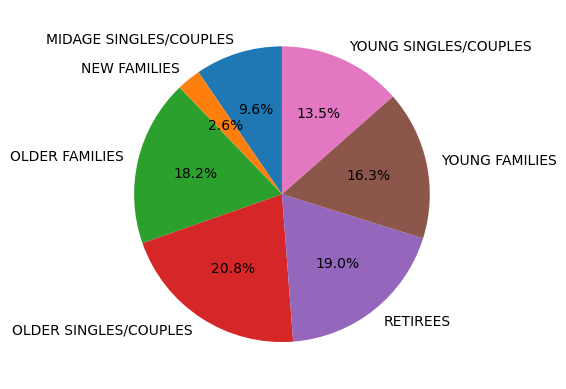

In [157]:
plt.pie(total_sales_by_lifestage,labels=total_sales_by_lifestage.index, autopct='%1.1f%%', startangle=90)
plt.show()

In [158]:
total_by_behaviour = merged_data.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()

In [159]:
total_by_behaviour.sort_values(ascending=False)

PREMIUM_CUSTOMER
Mainstream    700865.40
Budget        631406.85
Premium       472905.45
Name: TOT_SALES, dtype: float64

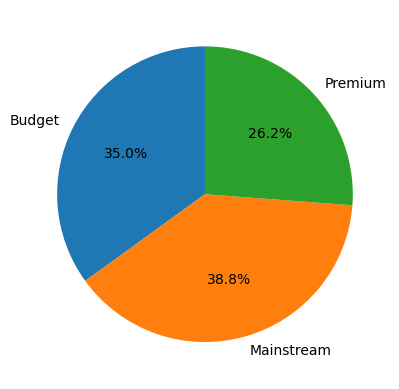

In [160]:
plt.pie(total_by_behaviour,labels=total_by_behaviour.index, autopct='%1.1f%%', startangle=90)
plt.show()

In [161]:
customerbysegment = merged_data.groupby('PREMIUM_CUSTOMER')['LYLTY_CARD_NBR'].sum()
customerbysegment

PREMIUM_CUSTOMER
Budget        11751531685
Mainstream    12882705280
Premium        8806497325
Name: LYLTY_CARD_NBR, dtype: int64

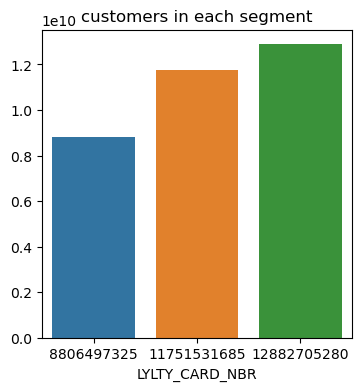

In [162]:
plt.figure(figsize=(4,4))
sns.barplot(data = customerbysegment, x=customerbysegment.index, y=customerbysegment.values)
plt.title("customers in each segment")
plt.show()

In [163]:
sales = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
sales

LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   33345.70
1   MIDAGE SINGLES/COUPLES       Mainstream   84734.25
2   MIDAGE SINGLES/COUPLES          Premium   54443.85
3             NEW FAMILIES           Budget   20607.45
4             NEW FAMILIES       Mainstream   15979.70
5             NEW FAMILIES          Premium   10760.80
6           OLDER FAMILIES           Budget  156863.75
7           OLDER FAMILIES       Mainstream   96413.55
8           OLDER FAMILIES          Premium   75242.60
9    OLDER SINGLES/COUPLES           Budget  127833.60
10   OLDER SINGLES/COUPLES       Mainstream  124648.50
11   OLDER SINGLES/COUPLES          Premium  123537.55
12                RETIREES           Budget  105916.30
13                RETIREES       Mainstream  145168.95
14                RETIREES          Premium   91296.65
15          YOUNG FAMILIES           Budget  129717.95
16          YOUNG FAMILIES       Mainstream   86338.25
17          YOUNG FAMILIES          Premium   78571.70
18   YOUNG SINGLES/COUPLES           Budget   57122.10
19   YOUNG SINGLES/COUPLES       Mainstream  147582.20
20   YOUNG SINGLES/COUPLES          Premium   39052.30

C:\Users\PAVI\AppData\Local\Temp\ipykernel_1528\4017108096.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=sales, ci=None)


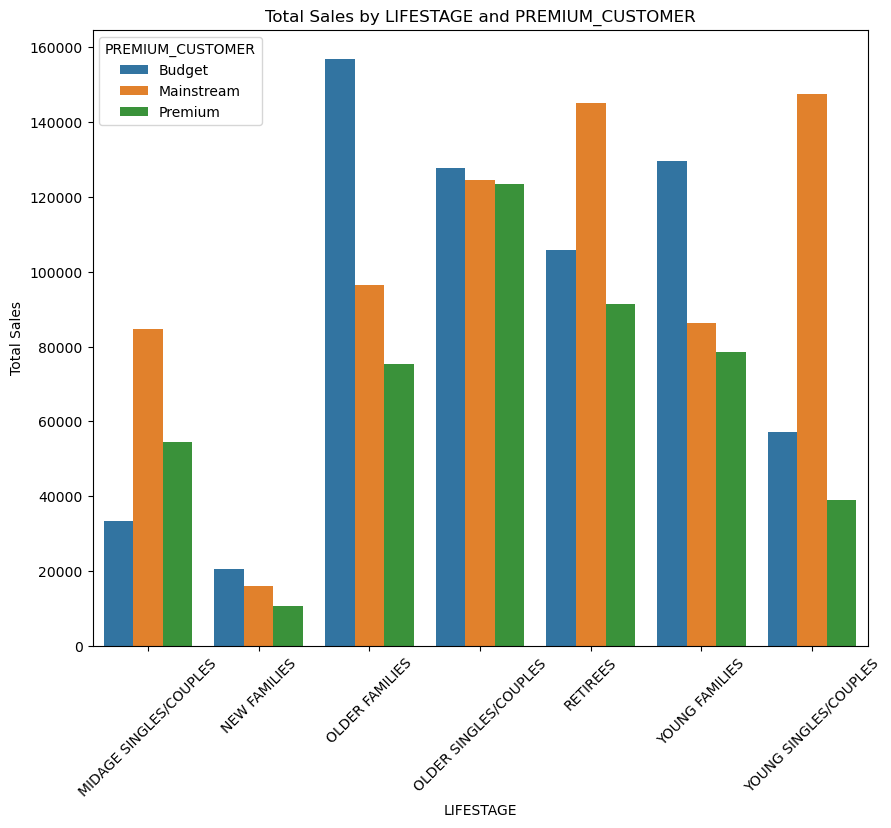

In [164]:
plt.figure(figsize=(10, 8))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=sales, ci=None)

plt.title('Total Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [165]:
customers = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
customers

LIFESTAGE PREMIUM_CUSTOMER  LYLTY_CARD_NBR
0   MIDAGE SINGLES/COUPLES           Budget            1474
1   MIDAGE SINGLES/COUPLES       Mainstream            3298
2   MIDAGE SINGLES/COUPLES          Premium            2369
3             NEW FAMILIES           Budget            1087
4             NEW FAMILIES       Mainstream             830
5             NEW FAMILIES          Premium             575
6           OLDER FAMILIES           Budget            4611
7           OLDER FAMILIES       Mainstream            2788
8           OLDER FAMILIES          Premium            2231
9    OLDER SINGLES/COUPLES           Budget            4849
10   OLDER SINGLES/COUPLES       Mainstream            4858
11   OLDER SINGLES/COUPLES          Premium            4682
12                RETIREES           Budget            4385
13                RETIREES       Mainstream            6358
14                RETIREES          Premium            3812
15          YOUNG FAMILIES           Budget            3953
16          YOUNG FAMILIES       Mainstream            2685
17          YOUNG FAMILIES          Premium            2398
18   YOUNG SINGLES/COUPLES           Budget            3647
19   YOUNG SINGLES/COUPLES       Mainstream            7917
20   YOUNG SINGLES/COUPLES          Premium            2480

In [166]:
merged_data['LYLTY_CARD_NBR'].nunique()

71287

In [167]:
customers['LYLTY_CARD_NBR'].sum()

71287

C:\Users\PAVI\AppData\Local\Temp\ipykernel_1528\429269736.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='LIFESTAGE', y='LYLTY_CARD_NBR', hue='PREMIUM_CUSTOMER', data=customers, ci=None)


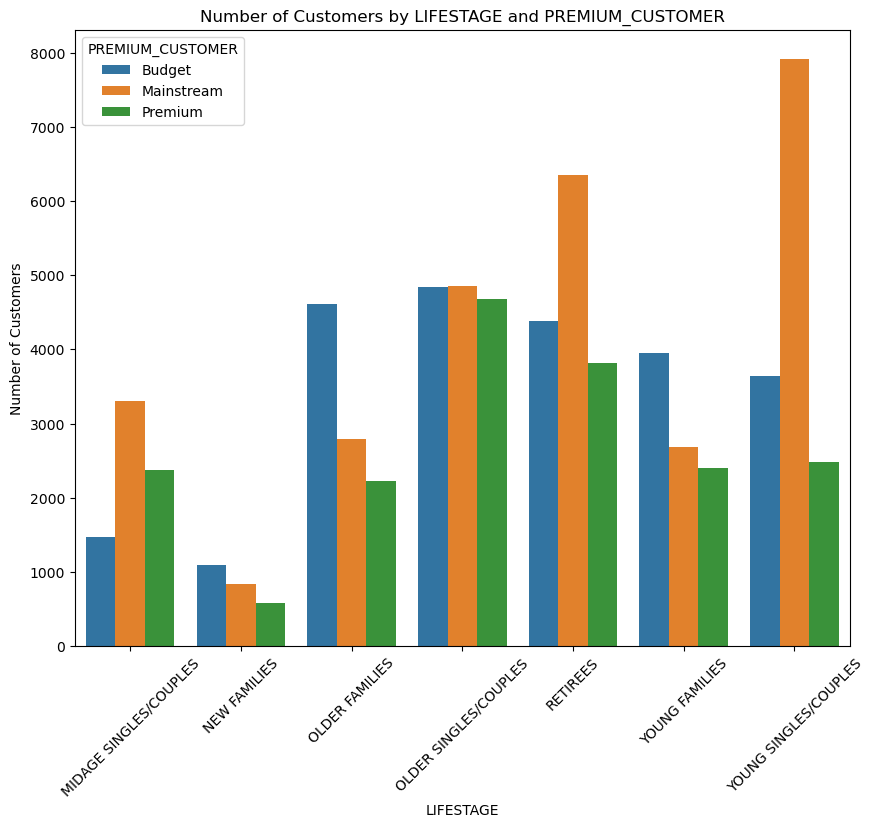

In [168]:
plt.figure(figsize=(10, 8))
sns.barplot(x='LIFESTAGE', y='LYLTY_CARD_NBR', hue='PREMIUM_CUSTOMER', data=customers, ci=None)

plt.title('Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

plt.show()

In [169]:
average_units = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(lambda x: x['TOT_SALES'].sum() / x['LYLTY_CARD_NBR'].nunique()).reset_index()
average_units.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'AVG_UNITS']

In [170]:
average_units

LIFESTAGE PREMIUM_CUSTOMER  AVG_UNITS
0   MIDAGE SINGLES/COUPLES           Budget  22.622592
1   MIDAGE SINGLES/COUPLES       Mainstream  25.692617
2   MIDAGE SINGLES/COUPLES          Premium  22.981786
3             NEW FAMILIES           Budget  18.958096
4             NEW FAMILIES       Mainstream  19.252651
5             NEW FAMILIES          Premium  18.714435
6           OLDER FAMILIES           Budget  34.019464
7           OLDER FAMILIES       Mainstream  34.581618
8           OLDER FAMILIES          Premium  33.725952
9    OLDER SINGLES/COUPLES           Budget  26.362879
10   OLDER SINGLES/COUPLES       Mainstream  25.658399
11   OLDER SINGLES/COUPLES          Premium  26.385636
12                RETIREES           Budget  24.154230
13                RETIREES       Mainstream  22.832487
14                RETIREES          Premium  23.949803
15          YOUNG FAMILIES           Budget  32.815065
16          YOUNG FAMILIES       Mainstream  32.155773
17          YOUNG FAMILIES          Premium  32.765513
18   YOUNG SINGLES/COUPLES           Budget  15.662764
19   YOUNG SINGLES/COUPLES       Mainstream  18.641177
20   YOUNG SINGLES/COUPLES          Premium  15.746895

C:\Users\PAVI\AppData\Local\Temp\ipykernel_1528\3263305674.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='LIFESTAGE', y='AVG_UNITS', hue='PREMIUM_CUSTOMER', data=average_units, ci=None)


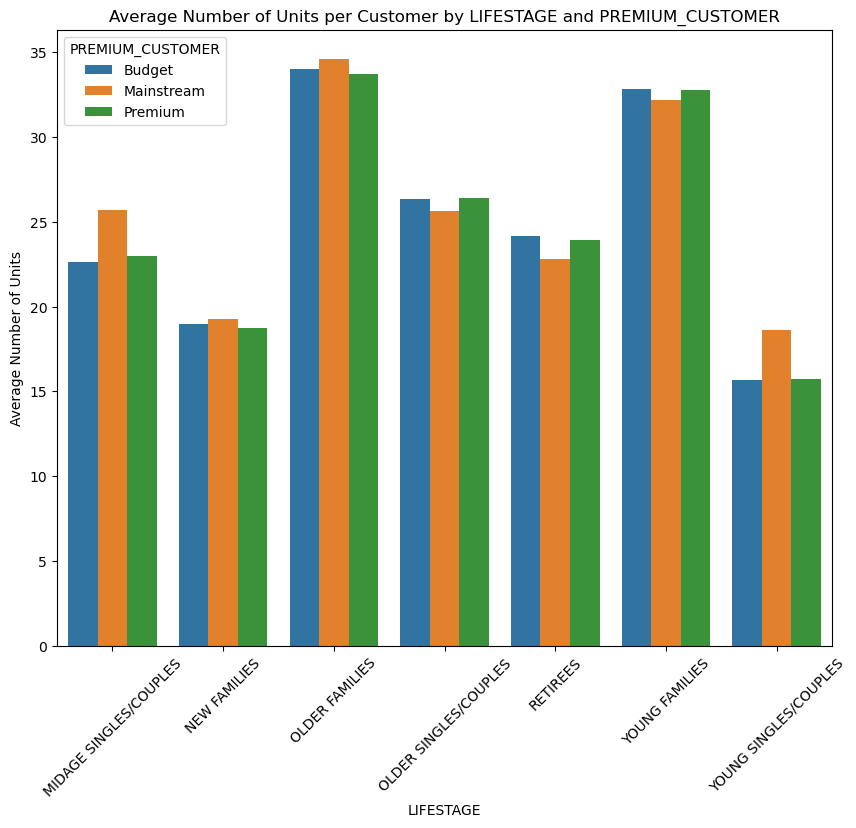

In [171]:
plt.figure(figsize=(10, 8))
sns.barplot(x='LIFESTAGE', y='AVG_UNITS', hue='PREMIUM_CUSTOMER', data=average_units, ci=None)

plt.title('Average Number of Units per Customer by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Number of Units')

plt.xticks(rotation=45)

plt.show()

In [172]:
average_price = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(lambda x: x['TOT_SALES'].sum() / x['PROD_QTY'].sum()).reset_index()
average_price.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'AVG_PRICE']
average_price

LIFESTAGE PREMIUM_CUSTOMER  AVG_PRICE
0   MIDAGE SINGLES/COUPLES           Budget   3.753878
1   MIDAGE SINGLES/COUPLES       Mainstream   3.994449
2   MIDAGE SINGLES/COUPLES          Premium   3.780823
3             NEW FAMILIES           Budget   3.931969
4             NEW FAMILIES       Mainstream   3.935887
5             NEW FAMILIES          Premium   3.886168
6           OLDER FAMILIES           Budget   3.747969
7           OLDER FAMILIES       Mainstream   3.736380
8           OLDER FAMILIES          Premium   3.717703
9    OLDER SINGLES/COUPLES           Budget   3.887529
10   OLDER SINGLES/COUPLES       Mainstream   3.822753
11   OLDER SINGLES/COUPLES          Premium   3.897698
12                RETIREES           Budget   3.932731
13                RETIREES       Mainstream   3.852986
14                RETIREES          Premium   3.924037
15          YOUNG FAMILIES           Budget   3.761903
16          YOUNG FAMILIES       Mainstream   3.722439
17          YOUNG FAMILIES          Premium   3.759232
18   YOUNG SINGLES/COUPLES           Budget   3.685297
19   YOUNG SINGLES/COUPLES       Mainstream   4.074043
20   YOUNG SINGLES/COUPLES          Premium   3.692889

C:\Users\PAVI\AppData\Local\Temp\ipykernel_1528\1618397433.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='LIFESTAGE', y='AVG_PRICE', hue='PREMIUM_CUSTOMER', data=average_price, ci=None)


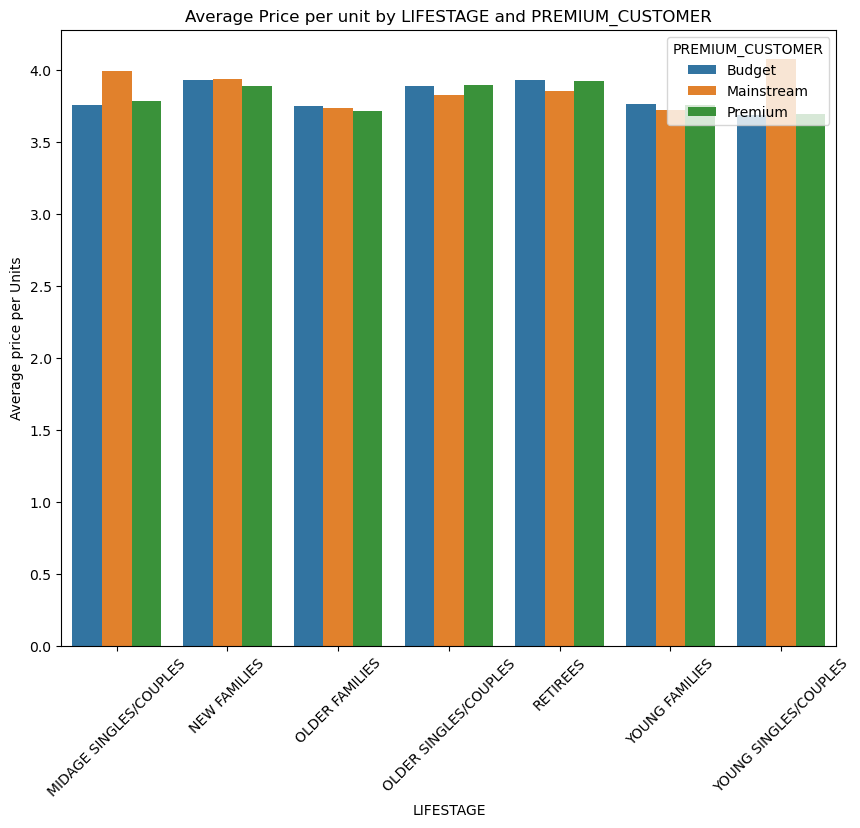

In [173]:
plt.figure(figsize=(10, 8))
sns.barplot(x='LIFESTAGE', y='AVG_PRICE', hue='PREMIUM_CUSTOMER', data=average_price, ci=None)

plt.title('Average Price per unit by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average price per Units')

plt.xticks(rotation=45)

plt.show()

In [174]:
from scipy import stats
mainstream = merged_data[(merged_data['LIFESTAGE'].isin(['MIDAGE', 'YOUNG SINGLES/COUPLES'])) & (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')]['TOT_SALES']
premium_budget = merged_data[(merged_data['LIFESTAGE'].isin(['MIDAGE', 'YOUNG SINGLES/COUPLES'])) & (merged_data['PREMIUM_CUSTOMER'].isin(['Premium', 'Budget']))]['TOT_SALES']

t_stat, p_val = stats.ttest_ind(mainstream, premium_budget)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

T-statistic: 31.705644165300615
P-value: 1.9392538652617613e-217


In [175]:
merged_data.head()

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-07-01         88           88140   86914        25   
1 2018-07-01         60           60276   57330         3   
2 2018-07-01        199          199014  197623       104   
3 2018-07-01         35           35052   31630        11   
4 2018-07-01         72           72104   71038        20   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0            Pringles SourCream  Onion 134g         2        7.4   
1  Kettle Sensations   Camembert & Fig 150g         2        9.2   
2  Infuzions Thai SweetChili PotatoMix 110g         2        7.6   
3                  RRD Pc Sea Salt     165g         1        3.0   
4          Doritos Cheese      Supreme 330g         2       11.4   

   PACK_SIZE_gm BRAND_NAME               LIFESTAGE PREMIUM_CUSTOMER  
0           134   Pringles  MIDAGE SINGLES/COUPLES       Mainstream  
1           150     Kettle                RETIREES       Mainstream  
2           110  Infuzions                RETIREES          Premium  
3           165        RRD   YOUNG SINGLES/COUPLES           Budget  
4           330    Doritos   OLDER SINGLES/COUPLES       Mainstream

In [176]:
brand_sales=merged_data.BRAND_NAME.value_counts().sort_index().sort_values(ascending=False)
brand_sales

BRAND_NAME
Kettle        41288
Smiths        30353
Doritos       25224
Pringles      25102
RRD           16321
Infuzions     14201
Thins         14075
Woolworths    11836
Cobs           9693
Tostitos       9471
Twisties       9454
GrnWves        7740
Natural        7469
Tyrrells       6442
Cheezels       4603
CCs            4551
Sunbites       3008
Cheetos        2927
Burger         1564
French         1418
Name: count, dtype: int64

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]),
 [Text(0.0, 0, '0'),
  Text(5000.0, 0, '5000'),
  Text(10000.0, 0, '10000'),
  Text(15000.0, 0, '15000'),
  Text(20000.0, 0, '20000'),
  Text(25000.0, 0, '25000'),
  Text(30000.0, 0, '30000'),
  Text(35000.0, 0, '35000'),
  Text(40000.0, 0, '40000'),
  Text(45000.0, 0, '45000')])

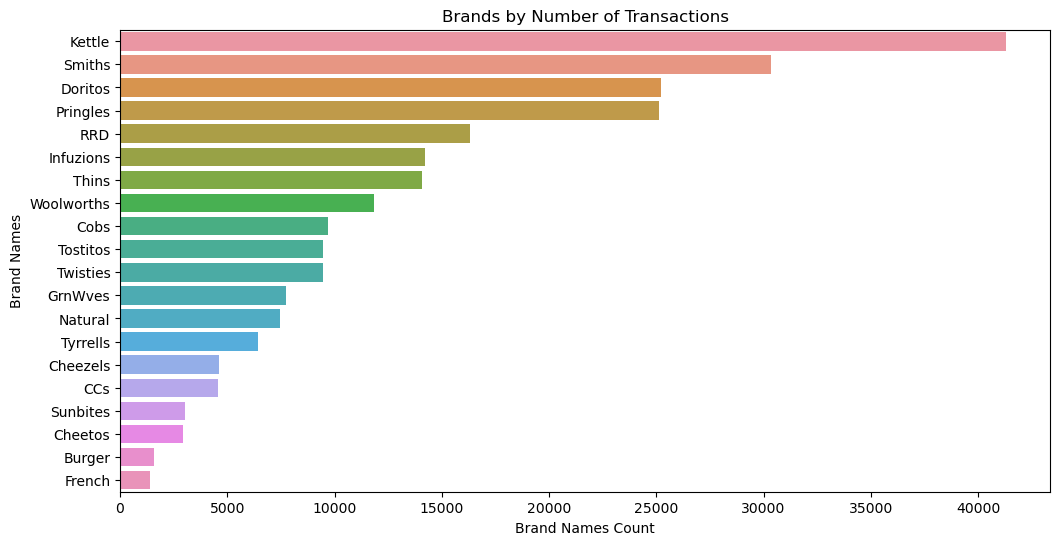

In [177]:
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_sales.values, y=brand_sales.index)

plt.xlabel('Brand Names Count')
plt.ylabel('Brand Names')
plt.title('Brands by Number of Transactions')

plt.xticks(rotation=360)

In [178]:
pack_sizes =merged_data.PACK_SIZE_gm.value_counts().sort_index().sort_values(ascending=False)
pack_sizes

PACK_SIZE_gm
175    66390
150    40203
134    25102
110    22387
170    19983
165    15297
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '70'),
  Text(1, 0, '90'),
  Text(2, 0, '110'),
  Text(3, 0, '125'),
  Text(4, 0, '134'),
  Text(5, 0, '135'),
  Text(6, 0, '150'),
  Text(7, 0, '160'),
  Text(8, 0, '165'),
  Text(9, 0, '170'),
  Text(10, 0, '175'),
  Text(11, 0, '180'),
  Text(12, 0, '190'),
  Text(13, 0, '200'),
  Text(14, 0, '210'),
  Text(15, 0, '220'),
  Text(16, 0, '250'),
  Text(17, 0, '270'),
  Text(18, 0, '330'),
  Text(19, 0, '380')])

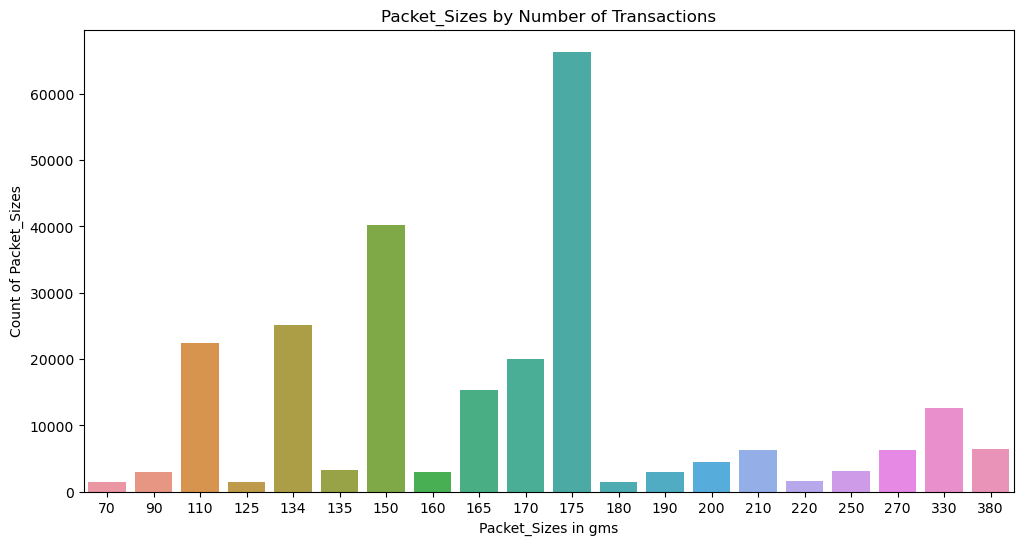

In [179]:
plt.figure(figsize=(12, 6)) 
sns.barplot(x=pack_sizes.index, y=pack_sizes.values)

plt.ylabel('Count of Packet_Sizes')
plt.xlabel('Packet_Sizes in gms')
plt.title('Packet_Sizes by Number of Transactions')

plt.xticks(rotation=360)

In [ ]:
!pip install mlxtend
import mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Assuming 'df' is your DataFrame with 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'BRAND', and 'CUSTOMER_ID' columns
# Filter the data for 'Mainstream - young singles/couples'
df_filtered = merged_data[(merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')]

# Create a pivot table with 'CUSTOMER_ID' as index and 'BRAND' as columns
basket = pd.pivot_table(data=df_filtered, index='LYLTY_CARD_NBR', columns='BRAND_NAME', aggfunc=len, fill_value=0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply the apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.07, use_colnames=True)

# Generate the rules with their corresponding support, confidence and lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the top 10 rules sorted by lift
rules.sort_values('lift', ascending=False).head(10)